In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Load the image and convert to grayscale
img_path = r"../image1.jpg"
orig = cv2.imread(img_path, cv2.IMREAD_COLOR)
if orig is None:
    raise FileNotFoundError(f"Could not load {img_path}")
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)

In [3]:

# 2. Add salt & pepper noise
def salt_pepper_noise(image, amount=0.05):
    """
    Adds salt & pepper noise to a grayscale image.
    amount: fraction of pixels to be noised.
    """
    out = image.copy()
    num_pixels = int(amount * image.size)
    # Salt (255)
    coords = [np.random.randint(0, i, num_pixels) for i in image.shape]
    out[coords[0], coords[1]] = 255
    # Pepper (0)
    coords = [np.random.randint(0, i, num_pixels) for i in image.shape]
    out[coords[0], coords[1]] = 0
    return out

noisy = salt_pepper_noise(gray, amount=0.05)

In [4]:


# 3. Apply non‐linear filters
# 3×3, 5×5, 7×7 median filters
med3 = cv2.medianBlur(noisy, 3)
med5 = cv2.medianBlur(noisy, 5)
med7 = cv2.medianBlur(noisy, 7)

# Morphological filters with a 5×5 structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
eroded  = cv2.erode(noisy, kernel)
dilated = cv2.dilate(noisy, kernel)
opening = cv2.morphologyEx(noisy, cv2.MORPH_OPEN,  kernel)
closing = cv2.morphologyEx(noisy, cv2.MORPH_CLOSE, kernel)

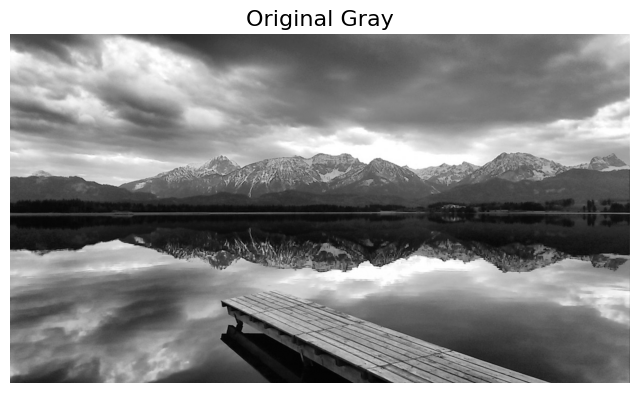

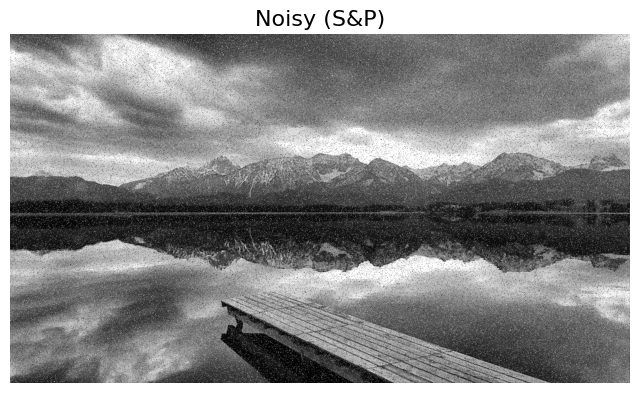

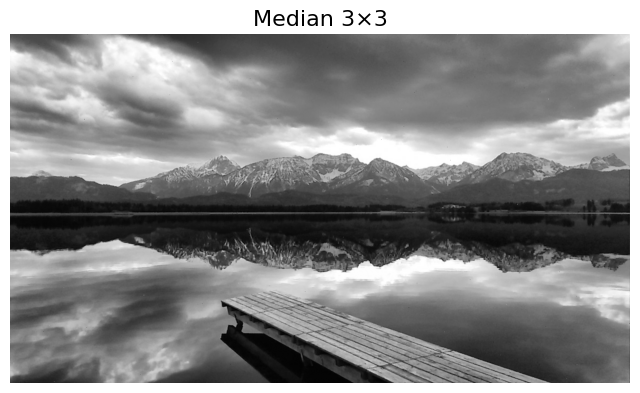

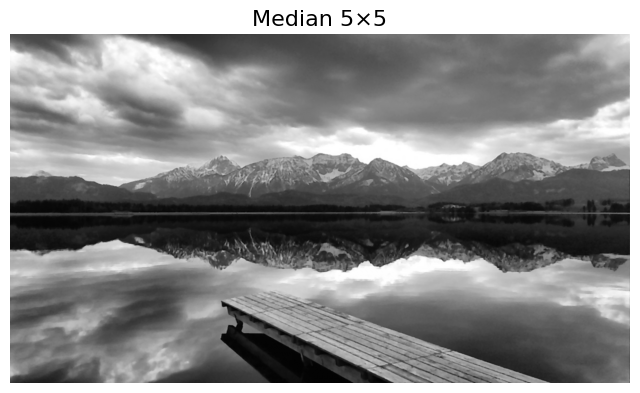

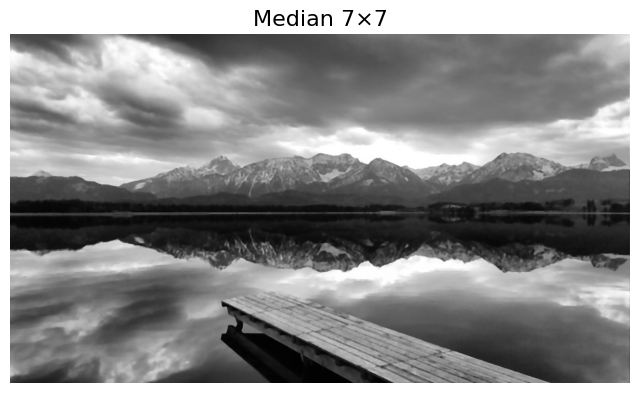

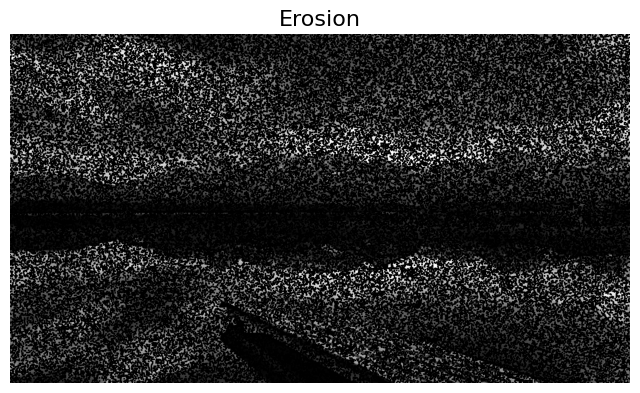

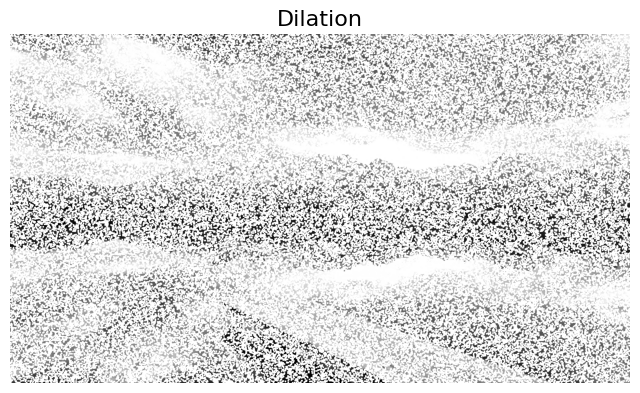

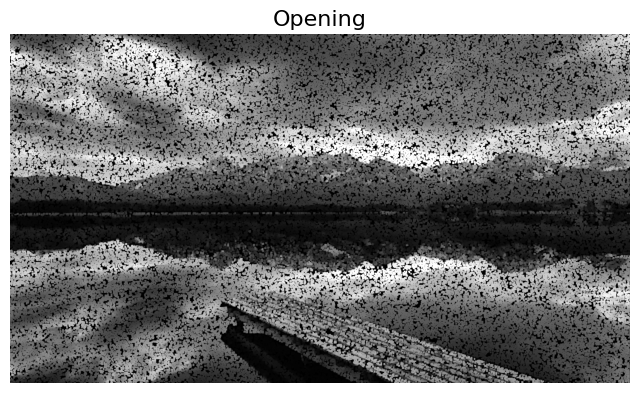

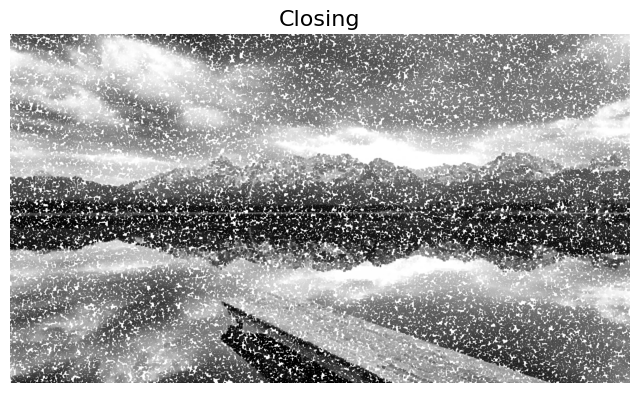

In [5]:
# 4. Prepare results dictionary
results = {
    "Original Gray": gray,
    "Noisy (S&P)": noisy,
    "Median 3×3":     med3,
    "Median 5×5":     med5,
    "Median 7×7":     med7,
    "Erosion":        eroded,
    "Dilation":       dilated,
    "Opening":        opening,
    "Closing":        closing,
}

# 5. Display each result full‐size
for title, out in results.items():
    plt.figure(figsize=(8,8))
    plt.imshow(out, cmap='gray')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()
